# SARIMA Model For Rajasthan EV Traffic Forecasting

# Importing dataset & libraries

In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib    
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [51]:
Raj = pd.read_csv('Raj_Updated_2015 to 2022.csv', low_memory=False)

# Exploratory Data Analysis

In [52]:
#Dropping off 'PaymentCategory'

Raj = Raj.drop(labels=['PaymentCategory'], axis=1)

In [53]:
#Printing Vehicle Type Category

Raj.ClassName.unique()

array(['3 Axle Vehicle', 'Bus', 'CJV', 'LCV', 'MAV', 'Oversized',
       'Three wheelers', 'Tractor with Trailer',
       'Tractor without Trailer', 'Truck 2 axle', 'Two wheelers',
       'Unable to classify', nan], dtype=object)

In [54]:
#Removing insignificant vehicle types from the dataset

Raj = Raj[(Raj.ClassName != "Two wheelers") & (Raj.ClassName != "Three wheelers") & (Raj.ClassName != "Oversized") & 
          (Raj.ClassName != "Unable to classify") & (Raj.ClassName != "Tractor with Trailer") & 
          (Raj.ClassName != "Tractor without Trailer") & (Raj.ClassName != "3 Axle Vehicle")& (Raj.ClassName != "MAV")
          & (Raj.ClassName != "Truck 2 axle")]

In [55]:
Raj.ClassName.unique()

array(['Bus', 'CJV', 'LCV', nan], dtype=object)

In [56]:
#Summation of indivisual traffic data points under the same classsName for removing data redundancy

Raj=Raj.groupby(["ClassName", "Project Name"], as_index=False)['Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15','Nov15','Dec15','Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16','Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17','Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19','Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21','Jan22','Feb22','March22'
 ].sum()

In [57]:
#Month wise traffic data converted to Yearly summation of traffic for respective months

In [58]:
Raj['Jul-Dec-15'] = Raj.loc[0 : 350,['Apr15','May15','Jun15','Jul15','Aug15','Sep15','Oct15','Nov15','Dec15']].sum(axis = 1)

Raj['Jan-Dec-16'] = Raj.loc[0 : 350,['Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16']].sum(axis = 1)

Raj['Jan-Dec-17'] = Raj.loc[0 : 350,['Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17']].sum(axis = 1)

Raj['Jan-Dec-18'] = Raj.loc[0 : 350,['Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18']].sum(axis = 1)

In [59]:
Raj['Jan-Dec-19'] = Raj.loc[0 : 350,['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19']].sum(axis = 1)
Raj['Jan-Dec-20'] = Raj.loc[0 : 350,['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20']].sum(axis = 1)
Raj['Jan-Dec-21'] = Raj.loc[0 : 350,['Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21']].sum(axis = 1)
Raj['Jan-Mar-22'] = Raj.loc[0 : 350,['Jan22','Feb22','March22']].sum(axis = 1)

In [60]:
print(Raj)

   ClassName Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  \
0        Bus   BPPTL-TP01      0      0    186    174    174    179    185   
1        Bus   BPPTL-TP02      0      0    276    265    265    273    276   
2        Bus   BPPTL-TP03      0      0    340    317    307    343    344   
3        Bus   BPPTL-TP04      0      0    293    260    176    298    289   
4        CJV   BPPTL-TP01      0      0   1709   1547   1515   1680   1691   
5        CJV   BPPTL-TP02      0      0   2554   2281   2349   2515   2509   
6        CJV   BPPTL-TP03      0      0   2576   2310   2397   2686   2510   
7        CJV   BPPTL-TP04      0      0   2940   2493   1861   3012   2894   
8        LCV   BPPTL-TP01      0      0    261    247    236    252    263   
9        LCV   BPPTL-TP02      0      0    383    358    362    369    411   
10       LCV   BPPTL-TP03      0      0    452    423    435    448    473   
11       LCV   BPPTL-TP04      0      0    423    391    266    

In [61]:
Raj['ClassName']

0     Bus
1     Bus
2     Bus
3     Bus
4     CJV
5     CJV
6     CJV
7     CJV
8     LCV
9     LCV
10    LCV
11    LCV
Name: ClassName, dtype: object

In [62]:
#Annualizing Data

Raj['Jul-Dec-15']= 2*Raj['Jul-Dec-15']
Raj['Jan-Mar-22']= 4*Raj['Jan-Mar-22']

In [63]:
#Toll wise summation

g_sum = Raj.groupby('Project Name', as_index=False).sum()
print(g_sum)

  Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  Nov15  Dec15  \
0   BPPTL-TP01      0      0   2156   1968   1925   2111   2139   2631   2405   
1   BPPTL-TP02      0      0   3213   2904   2976   3157   3196   3802   3642   
2   BPPTL-TP03      0      0   3368   3050   3139   3477   3327   4192   3701   
3   BPPTL-TP04      0      0   3656   3144   2303   3728   3625   4712   4065   

   ...  Feb22  March22  Jul-Dec-15  Jan-Dec-16  Jan-Dec-17  Jan-Dec-18  \
0  ...   4722     4163       30670       30581       33711       36186   
1  ...   5821     5027       45780       45991       50409       54430   
2  ...   5800     5015       48508       45886       49159       51747   
3  ...   6502     5540       50466       51678       57053       58019   

   Jan-Dec-19  Jan-Dec-20  Jan-Dec-21  Jan-Mar-22  
0       40037       42298       48527       50900  
1       58050       54148       58782       61912  
2       54405       52414       59248       61892  
3       61717  

In [64]:
g_sum = g_sum.drop(labels=['Jul-Dec-15', 'Jan-Dec-16', 'Jan-Dec-17',  'Jan-Dec-18','Jan-Dec-19','Jan-Dec-20','Jan-Dec-21', 'Jan-Mar-22' ], axis=1)

In [65]:
# Get sum of all rows as a new row in Dataframe

total = g_sum.sum()
total.name = 'Total'

# Assign sum of all rows of DataFrame as a new Row

g_sum = g_sum.append(total.transpose())
print(g_sum)

                                   Project Name  Apr15  May15  Jun15  Jul15  \
0                                    BPPTL-TP01      0      0   2156   1968   
1                                    BPPTL-TP02      0      0   3213   2904   
2                                    BPPTL-TP03      0      0   3368   3050   
3                                    BPPTL-TP04      0      0   3656   3144   
Total  BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04      0      0  12393  11066   

       Aug15  Sep15  Oct15  Nov15  Dec15  ...  Jun21  Jul21  Aug21  Sep21  \
0       1925   2111   2139   2631   2405  ...   3584   4140   4163   4146   
1       2976   3157   3196   3802   3642  ...   4493   5032   4973   4926   
2       3139   3477   3327   4192   3701  ...   4201   5202   5484   4937   
3       2303   3728   3625   4712   4065  ...   4639   5664   5812   5257   
Total  10343  12473  12287  15337  13813  ...  16917  20038  20432  19266   

       Oct21  Nov21  Dec21  Jan22  Feb22  March22  
0       39

In [66]:
i = g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')].index
i

Index(['Total'], dtype='object')

In [67]:
#Combining all 4 tolls under one category

Total_Traffic= g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')]
Total_Traffic

,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
Total,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,0,0,12393,11066,10343,12473,12287,15337,13813,...,16917,20038,20432,19266,18934,24817,22250,18274,22845,19745


In [68]:
#Dropping insignificant months(toll starts from July'15)

Total_Traffic= Total_Traffic.drop(labels=['Apr15', 'May15', 'Jun15'], axis=1)

In [69]:
#Calculate month wise total traffic from all 4 tolls combined under one column 'Month_year'

In [70]:
df_unpivoted = Total_Traffic.melt(id_vars=['Project Name'], value_name='BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')

In [71]:
df_unpivoted= df_unpivoted.rename(columns = {"variable":"Month_year"})
df_unpivoted

,Project Name,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jul15,11066
1,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Aug15,10343
2,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Sep15,12473
3,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Oct15,12287
4,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov15,15337
...,...,...,...
76,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov21,24817
77,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Dec21,22250
78,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jan22,18274
79,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Feb22,22845


In [72]:
#Month_year(format) column to Date column conversion

In [73]:
#Month wise Totall Traffic

df_unpivoted.drop(['Project Name'], axis = 1)

,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,Jul15,11066
1,Aug15,10343
2,Sep15,12473
3,Oct15,12287
4,Nov15,15337
...,...,...
76,Nov21,24817
77,Dec21,22250
78,Jan22,18274
79,Feb22,22845


In [74]:
df = pd.DataFrame()

df['date'] = pd.date_range('7/1/2015', periods=81, freq='M')  
print(df)

         date
0  2015-07-31
1  2015-08-31
2  2015-09-30
3  2015-10-31
4  2015-11-30
..        ...
76 2021-11-30
77 2021-12-31
78 2022-01-31
79 2022-02-28
80 2022-03-31

[81 rows x 1 columns]


In [75]:
pd.concat([df_unpivoted, df.reindex(df_unpivoted.index)], axis=1)

,Project Name,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,date
0,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jul15,11066,2015-07-31
1,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Aug15,10343,2015-08-31
2,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Sep15,12473,2015-09-30
3,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Oct15,12287,2015-10-31
4,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov15,15337,2015-11-30
...,...,...,...,...
76,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov21,24817,2021-11-30
77,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Dec21,22250,2021-12-31
78,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jan22,18274,2022-01-31
79,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Feb22,22845,2022-02-28


In [76]:
df1= df_unpivoted.drop(labels=['Project Name'], axis=1)
df1.rename(columns = {'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04':'Traffic'}, inplace = True)
df1


,Month_year,Traffic
0,Jul15,11066
1,Aug15,10343
2,Sep15,12473
3,Oct15,12287
4,Nov15,15337
...,...,...
76,Nov21,24817
77,Dec21,22250
78,Jan22,18274
79,Feb22,22845


In [77]:
df2 = pd.concat([df1, df.reindex(df1.index)], axis=1)


In [78]:
#Data in the from total 'Traffic' & respective 'Date'

df3= df2.drop(labels=['Month_year'], axis=1)

print(df3)

    Traffic       date
0     11066 2015-07-31
1     10343 2015-08-31
2     12473 2015-09-30
3     12287 2015-10-31
4     15337 2015-11-30
..      ...        ...
76    24817 2021-11-30
77    22250 2021-12-31
78    18274 2022-01-31
79    22845 2022-02-28
80    19745 2022-03-31

[81 rows x 2 columns]


In [79]:
#Date column in df3 converted to type Datetime & renamed as 'Month_year'

df3.date = pd.to_datetime(df3.date).dt.strftime('%m/%Y')
df3.rename(columns = {'date':'Month_year'}, inplace = True)

print (df3)

    Traffic Month_year
0     11066    07/2015
1     10343    08/2015
2     12473    09/2015
3     12287    10/2015
4     15337    11/2015
..      ...        ...
76    24817    11/2021
77    22250    12/2021
78    18274    01/2022
79    22845    02/2022
80    19745    03/2022

[81 rows x 2 columns]


In [80]:
#Totall Traffic converted to Average Total Traffic

In [81]:
df3['Traffic'] = df3['Traffic']/4
print (df3)

    Traffic Month_year
0   2766.50    07/2015
1   2585.75    08/2015
2   3118.25    09/2015
3   3071.75    10/2015
4   3834.25    11/2015
..      ...        ...
76  6204.25    11/2021
77  5562.50    12/2021
78  4568.50    01/2022
79  5711.25    02/2022
80  4936.25    03/2022

[81 rows x 2 columns]


In [82]:
#Average Toll Traffic calculated in a new data frame df4

df4 = df3[['Month_year', 'Traffic']]
df4

,Month_year,Traffic
0,07/2015,2766.50
1,08/2015,2585.75
2,09/2015,3118.25
3,10/2015,3071.75
4,11/2015,3834.25
...,...,...
76,11/2021,6204.25
77,12/2021,5562.50
78,01/2022,4568.50
79,02/2022,5711.25


In [83]:
#Datetime & time series conversion of the target variable 'Traffic'

In [84]:
df4['Month_year'] =  pd.to_datetime(df4['Month_year'])

In [85]:
#df4['Traffic']= df4['Traffic'].squeeze()

In [86]:
type(df4['Traffic'])

pandas.core.series.Series

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_year  81 non-null     datetime64[ns]
 1   Traffic     81 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


<AxesSubplot:>

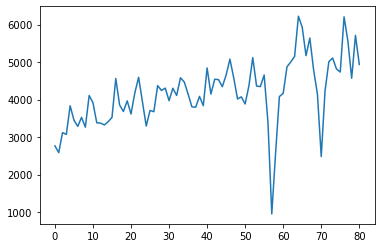

In [88]:
#Line graph-timeseries column 'Traffic'

df4['Traffic'].plot()

In [89]:
df4.tail(60)

,Month_year,Traffic
21,2017-04-01,4175.25
22,2017-05-01,4595.75
23,2017-06-01,3944.25
24,2017-07-01,3294.50
25,2017-08-01,3711.00
26,2017-09-01,3676.50
27,2017-10-01,4373.00
28,2017-11-01,4241.75
29,2017-12-01,4305.50
30,2018-01-01,3970.75


# Removing Outliers

In [90]:
#Outliers detected during covid period for the months Apr'20, May'20 & May'21

In [91]:
#removing outlier months from the dataframe df4 
    
df4= df4.drop(df4.index[[57,58,70]])

<AxesSubplot:>

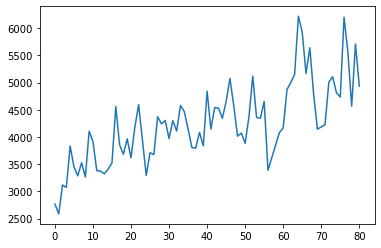

In [92]:
#Plot after outlier treatment

df4['Traffic'].plot()

In [93]:
df4

,Month_year,Traffic
0,2015-07-01,2766.50
1,2015-08-01,2585.75
2,2015-09-01,3118.25
3,2015-10-01,3071.75
4,2015-11-01,3834.25
...,...,...
76,2021-11-01,6204.25
77,2021-12-01,5562.50
78,2022-01-01,4568.50
79,2022-02-01,5711.25


# Data preparation for Time Series Modelling

In [94]:
Train= df4.iloc[:79]
Train.tail()

,Month_year,Traffic
76,2021-11-01,6204.25
77,2021-12-01,5562.50
78,2022-01-01,4568.50
79,2022-02-01,5711.25
80,2022-03-01,4936.25


In [95]:
Train = Train.set_index('Month_year')
Train.head()

,Traffic
Month_year,
2015-07-01,2766.50
2015-08-01,2585.75
2015-09-01,3118.25
2015-10-01,3071.75
2015-11-01,3834.25


In [96]:
Train_1=pd.Series(Train['Traffic'])

In [97]:
Train_1.head()

Month_year
2015-07-01    2766.50
2015-08-01    2585.75
2015-09-01    3118.25
2015-10-01    3071.75
2015-11-01    3834.25
Name: Traffic, dtype: float64

# Visualization & Stationarity Test

In [98]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
#stationarity test(Dickey-Fuller Test)

def check_stationarity(y, lags_plots=20, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(Train_1)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Traffic')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                 -0.9282
p-value                         0.7785
Lags Used                      10.0000
Number of Observations Used    67.0000
Critical Value (1%)            -3.5320
Critical Value (5%)            -2.9058
Critical Value (10%)           -2.5904
dtype: float64

The Test Statistics is higher than the Critical Value of 5%.
The series isn't stationary


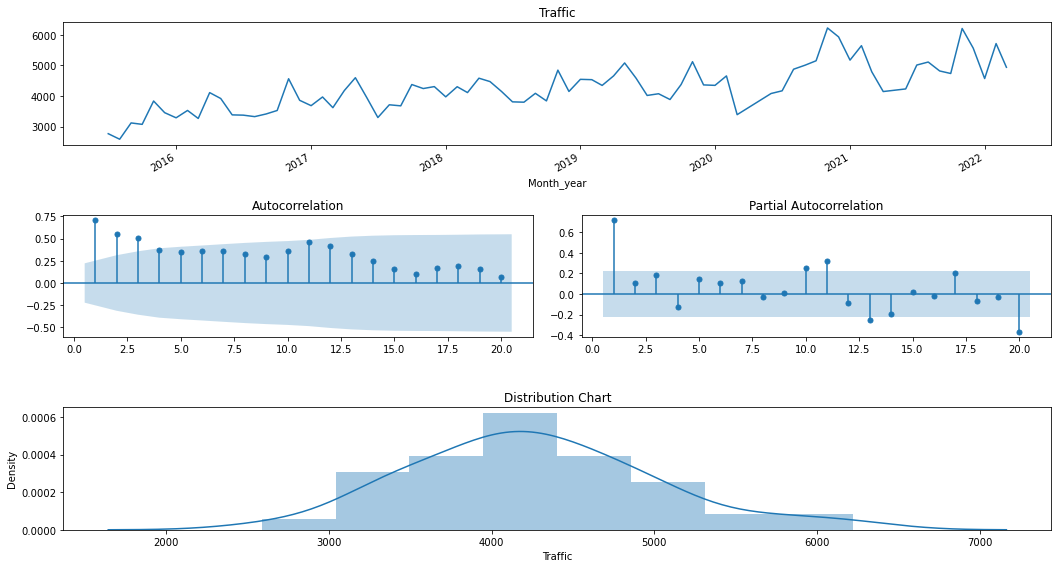

In [100]:
check_stationarity(Train_1)

# SARIMA model for final prediction

In [101]:
#AIC values calculated and the best obtained is used on the time series to get the prediction for next 6 months using SARIMA model

In [102]:
best_model_sarima = sm.tsa.statespace.SARIMAX(Train_1, order=(1,1,1), seasonal_order=(1, 1, 0, 12)).fit(dis=-1)
print(best_model_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             Traffic   No. Observations:                   78
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -498.355
Date:                             Sat, 18 Jun 2022   AIC                           1004.711
Time:                                     12:50:53   BIC                           1013.409
Sample:                                          0   HQIC                          1008.143
                                              - 78                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3893      0.095      4.115      0.000       0.204       0.575
ma.L1         -0.9998     1

In [103]:
#Getting Predictions for next quarter starting from Apr 2022


index_future_dates=pd.date_range(start='2022-04',end='2022-07',freq='M')
#print (index_future_dates)
L5=best_model_sarima.predict(start=len(Train_1) ,end= Train_1.shape[0] + 2,typ='levels')
L5.index= index_future_dates
print (L5)

2022-04-30    4844.628531
2022-05-31    4867.304756
2022-06-30    4193.429240
Freq: M, Name: predicted_mean, dtype: float64


In [104]:
#Plotting the train data and the final predictions

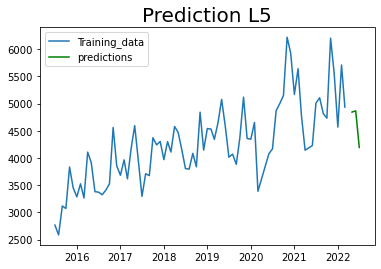

In [105]:
plt.title('Prediction L5', size=20)
#plt.figure(figsize=(20,5))
plt.plot(Train['Traffic'], label= 'Training_data')
plt.plot(L5, color='green', label= 'predictions')
plt.legend();